In [ ]:
# prompt: 마운트

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

df1= pd.read_excel("/content/drive/MyDrive/kdt/team_por/전처리/combined_df_investing (1).xlsx")
df2= pd.read_excel("/content/drive/MyDrive/kdt/team_por/전처리/naver.xlsx")
df3= pd.read_excel("/content/drive/MyDrive/kdt/team_por/soxl 레딧 최종 전처리 데이터.02.xlsx")

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SOXL_Open,SOXL_High,SOXL_Low,SOXL_Close,SOXL_Adj Close,SOXL_Volume,head_wordcount,Text_wordcount
count,16799.000000,16799.000000,16799.000000,16799.000000,1.679900e+04,1.679900e+04,16799.000000,16799.000000,16799.000000,16799.000000,1.679900e+04,1.679800e+04,16799.000000,16799.000000
mean,275.638985,279.890015,271.247154,275.892269,4.166797e+02,2.611749e+07,34.824031,35.906062,33.703664,34.845115,4.484913e+03,6.527605e+07,11.313114,26.186023
std,309.930299,314.902245,304.769874,310.289621,1.835620e+04,2.990938e+07,10.456299,10.767789,10.096000,10.438527,5.767828e+05,1.965750e+07,7.761970,29.355428
min,7.600000,7.770000,7.430000,7.630000,7.630000e+00,2.148000e+01,14.100000,15.110000,13.970000,14.530000,1.448550e+01,2.193350e+07,1.000000,0.000000
25%,96.620003,99.040001,96.120003,96.790001,9.679000e+01,4.130700e+06,24.860001,25.570000,23.870001,24.459999,2.434470e+01,4.947510e+07,6.000000,8.000000
50%,160.630005,162.289993,158.779999,160.380005,1.596700e+02,7.280100e+06,36.080002,37.959999,34.639999,36.450001,3.645000e+01,6.269620e+07,10.000000,17.000000
75%,183.589996,184.679993,183.029999,183.949997,1.820800e+02,4.955750e+07,43.709999,45.189999,41.980000,43.400002,4.340000e+01,8.037010e+07,14.000000,34.000000
max,1428.430054,1445.400024,1405.060059,1436.170044,2.379100e+06,1.733720e+08,55.939999,56.990002,52.099998,55.320000,7.475740e+07,1.283745e+08,66.000000,397.000000


In [ ]:
|

In [ ]:
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

In [ ]:
df=combined_df

In [ ]:
df

In [ ]:
df=df[df.src=='naver']
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("translation", model="Helsinki-NLP/opus-mt-ko-en")


pipe("한국어")[0]['translation_text']

from tqdm import tqdm
sample = list(df_on['head'])

for i in tqdm(range(len(sample))):
  sample[i] = pipe(sample[i])[0]['translation_text']

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'Korean'}]

In [ ]:
df.shape

(16807, 17)

In [ ]:
df.shape

(16788, 19)

In [ ]:
df=df[df.head_wordcount<300]

In [ ]:
df=df[df.Text_wordcount<300]

In [ ]:
df=df.dropna()

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#wordcount 생성

In [ ]:
## 워드 카운트 컬럼 생성
df['head_wordcount']=0
##워드 카운트 계산하기
df['head_wordcount'] = df['head'].apply(lambda x: len(word_tokenize(x)))

In [ ]:
df_isnull = df[df['Text'].isnull()]
df_notnull=df.dropna(subset=['Text'])

In [ ]:
## 워드 카운트 컬럼 생성
df_isnull['Text_wordcount']=0

<ipython-input-120-a9756f4347e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isnull['Text_wordcount']=0


In [ ]:
df_notnull['Text'] = df_notnull['Text'].astype(str)

<ipython-input-121-62dc8a39732d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notnull['Text'] = df_notnull['Text'].astype(str)


In [ ]:
## 워드 카운트 컬럼 생성
df_notnull['Text_wordcount']=0
##워드 카운트 계산하기
df_notnull['Text_wordcount'] = df_notnull['Text'].apply(lambda x: len(word_tokenize(x)))

<ipython-input-122-f80a7c5c95fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notnull['Text_wordcount']=0
<ipython-input-122-f80a7c5c95fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notnull['Text_wordcount'] = df_notnull['Text'].apply(lambda x: len(word_tokenize(x)))


In [ ]:
df=pd.concat([df_notnull, df_isnull], ignore_index=True)

#문서요약

In [ ]:
wordcount_iqr = df['head_wordcount'].quantile(0.75) - df['head_wordcount'].quantile(0.25)
wordcount_iqr=wordcount_iqr*1.5+df['head_wordcount'].quantile(0.75)
print("IQR of 'head_wordcount' column:", wordcount_iqr)

IQR of 'head_wordcount' column: 26.0


In [ ]:
wordcount_iqr = df['Text_wordcount'].quantile(0.75) - df['Text_wordcount'].quantile(0.25)
wordcount_iqr=wordcount_iqr*1.5+df['Text_wordcount'].quantile(0.75)
print("IQR of 'Text_wordcount' column:", wordcount_iqr)

IQR of 'Text_wordcount' column: 73.0


In [ ]:
from transformers import pipeline
summarizer1 = pipeline('summarization',max_length=26, min_length=10, do_sample=False)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
df_on = df[df['head_wordcount'] >= 26]

# Create df_under where wordcount is less than 120
df_under = df[df['head_wordcount'] < 26]

In [ ]:
from tqdm import tqdm
sample = list(df_on['head'])

for i in tqdm(range(len(sample))):
  sample[i] = summarizer1(sample[i])[0]['summary_text']

0it [00:00, ?it/s]


In [ ]:
df_on['head']=sample

In [ ]:
df = pd.concat([df_on, df_under])
df = df.sort_index()

In [ ]:
from transformers import pipeline
summarizer2 = pipeline('summarization',max_length=72, min_length=10, do_sample=False)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
df_on = df[df['Text_wordcount'] >= 73]

# Create df_under where wordcount is less than 120
df_under = df[df['Text_wordcount'] < 73]

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

summar2 = pipeline("translation", model="Helsinki-NLP/opus-mt-ko-en")
summar2(sample[i])[0]['translation_text']
from tqdm import tqdm
sample = list(df['Text'])

for i in tqdm(range(len(sample))):
  sample[i] = summar2(sample[i])[0]['translation_text']

In [ ]:
df['Text']=sample

In [ ]:
from tqdm import tqdm
sample = list(df_on['Text'])

for i in tqdm(range(len(sample))):
  sample[i] = summarizer2(sample[i])[0]['summary_text']

  2%|▏         | 16/1044 [01:57<2:06:15,  7.37s/it]


KeyboardInterrupt: 

In [ ]:

summar2(sample[i])[0]['translation_text']

In [ ]:
df_on['Text']=sample

In [ ]:
df = pd.concat([df_on, df_under])
df = df.sort_index()

In [ ]:
df.describe()

#여기까지만 돌릴것

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="mwkby/distilbert-base-uncased-sentiment-reddit-crypto")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/765 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/360 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
pipe('I hate you')[0]['label']

'negative'

In [ ]:
def get_label(text):
    result = pipe(text)
    return result[0]['label']

In [ ]:
pip install tqdm

In [ ]:
from tqdm import tqdm
head_labels = []

# 반복문을 통해 각 행에 대해 pipe 함수 적용 및 레이블 추출
for text in tqdm(df['head']):
    label = get_label(text)
    head_labels.append(label)

# 'head_label' 열로 추가
df['head_label'] = head_labels

100%|██████████| 16881/16881 [17:43<00:00, 15.88it/s]


In [ ]:
df['head_label'] = df['head_label'].replace('positive', 1)
df['head_label'] = df['head_label'].replace('negative', -1)

In [ ]:
from tqdm import tqdm
head_labels = []

# 반복문을 통해 각 행에 대해 pipe 함수 적용 및 레이블 추출
for text in tqdm(df['Text']):
    label = get_label(text)
    head_labels.append(label)

# 'head_label' 열로 추가
df['Text_label'] = head_labels

In [ ]:
df['Text_label'] = df['head_label'].replace('positive', 1)
df['Text_label'] = df['head_label'].replace('negative', -1)

In [ ]:
df.head_label.unique()

array([ 1, -1])

In [ ]:
from tqdm import tqdm
head_labels = []

# 반복문을 통해 각 행에 대해 pipe 함수 적용 및 레이블 추출
for text in tqdm(df['head']):
    label = get_label(text)
    head_labels.append(label)

# 'head_label' 열로 추가
df['head_label'] = head_labels

In [ ]:
df['head_label'] = df['head_label'].replace('positive', 1)
df['head_label'] = df['head_label'].replace('negative', -1)

In [ ]:
df.to_excel('/content/drive/MyDrive/kdt/team_por/df_label.xlsx')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month

In [ ]:
df['Date'].unique()

<DatetimeArray>
['2024-05-21 00:00:00', '2024-04-26 00:00:00', '2024-05-03 00:00:00',
 '2023-10-23 00:00:00', '2024-05-17 00:00:00', '2024-05-01 00:00:00',
 '2024-05-10 00:00:00', '2024-04-30 00:00:00', '2024-05-13 00:00:00',
 '2024-05-08 00:00:00',
 ...
 '2023-08-07 00:00:00', '2023-07-25 00:00:00', '2023-06-07 00:00:00',
 '2024-01-09 00:00:00', '2023-09-07 00:00:00', '2023-09-25 00:00:00',
 '2023-08-14 00:00:00', '2024-01-12 00:00:00', '2023-07-31 00:00:00',
 '2023-07-24 00:00:00']
Length: 324, dtype: datetime64[ns]

In [ ]:
df = df.drop(columns=['SOXL_Open','SOXL_High','SOXL_Low','SOXL_Close','SOXL_Volume'])

In [ ]:
pip install finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 762.7 kB/s eta 0:00:00


In [ ]:
import FinanceDataReader as fdr

# SOXL 데이터 불러오기
df_soxl = fdr.DataReader('SOXL','2023-05-19')

In [ ]:
df_soxl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-19,17.590000,17.639999,17.059999,17.389999,17.281347,49381700
2023-05-22,16.920000,17.719999,16.889999,17.530001,17.420475,43944400
2023-05-23,17.200001,17.549999,16.790001,16.920000,16.814283,41287200
2023-05-24,15.890000,16.230000,15.490000,16.030001,15.929846,87475800
2023-05-25,18.160000,19.389999,17.629999,19.150000,19.030352,124768700
...,...,...,...,...,...,...
2024-05-20,45.959999,49.299999,45.810001,48.250000,48.250000,55103200
2024-05-21,46.549999,48.189999,46.410000,47.980000,47.980000,36437200
2024-05-22,49.250000,50.000000,48.099998,49.380001,49.380001,55487800


In [ ]:
df_soxl['Adj Close Change %'] = df_soxl['Adj Close'].pct_change() * 100

In [ ]:
df_soxl['Next Adj Close'] = df_soxl['Adj Close'].shift(-1)
df_soxl['Change Rate'] = ((df_soxl['Next Adj Close'] - df_soxl['Adj Close']) / df_soxl['Adj Close']) * 100


In [ ]:
#df_soxl=df_soxl.dropna()
df_soxl

,Open,High,Low,Close,Adj Close,Volume,Adj Close Change %,Next Adj Close,Change Rate
Date,,,,,,,,,
2023-05-19,17.590000,17.639999,17.059999,17.389999,17.281347,49381700,NaN,17.420475,0.805076
2023-05-22,16.920000,17.719999,16.889999,17.530001,17.420475,43944400,0.805076,16.814283,-3.479767
2023-05-23,17.200001,17.549999,16.790001,16.920000,16.814283,41287200,-3.479767,15.929846,-5.260034
2023-05-24,15.890000,16.230000,15.490000,16.030001,15.929846,87475800,-5.260034,19.030352,19.463503
2023-05-25,18.160000,19.389999,17.629999,19.150000,19.030352,124768700,19.463503,22.737045,19.477795
...,...,...,...,...,...,...,...,...,...
2024-05-20,45.959999,49.299999,45.810001,48.250000,48.250000,55103200,6.277528,47.980000,-0.559585
2024-05-21,46.549999,48.189999,46.410000,47.980000,47.980000,36437200,-0.559585,49.380001,2.917885
2024-05-22,49.250000,50.000000,48.099998,49.380001,49.380001,55487800,2.917885,48.810001,-1.154313


In [ ]:
def trading_signal(value):
    if value > 0.141:
        return 4
    elif value > 0.103:
        return 3
    elif value >= -0.103 and value <= 0.103:
        return 2
    elif value >-0.241:
        return 1
    else:
        return 0

# 'Adj Close Change %' 열에 함수 적용하여 신호 열 생성
df_soxl['Signal'] = df_soxl['Adj Close Change %'].apply(trading_signal)

<ipython-input-45-4e122ca672c7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soxl['Signal'] = df_soxl['Adj Close Change %'].apply(trading_signal)


In [ ]:
df_soxl.Signal.unique()

array([4, 0, 2, 1, 3])

In [ ]:
df_soxl.Signal[df_soxl.Signal==0].shape

(110,)

In [ ]:
df_soxl.Signal[df_soxl.Signal==1].shape

(1,)

In [ ]:
df_soxl.Signal[df_soxl.Signal==2].shape

(8,)

In [ ]:
df_soxl.Signal[df_soxl.Signal==3].shape

(1,)

In [ ]:
df_soxl.Signal[df_soxl.Signal==4].shape

(135,)

ValueError: Could not interpret value `A` for `y`. An entry with this name does not appear in `data`.

In [ ]:
df_soxl.describe()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Change %,Signal
count,255.000000,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000,255.000000
mean,29.281569,30.191686,28.353647,29.301176,29.239853,6.465011e+07,0.567116,2.196078
std,9.952748,10.232735,9.568122,9.889089,9.918424,1.837164e+07,5.299192,1.956411
min,14.540000,15.030000,14.010000,14.530000,14.485496,2.193350e+07,-12.147883,0.000000
25%,21.735000,22.415000,21.005000,21.765000,21.645737,5.093950e+07,-2.596858,0.000000
50%,25.459999,26.379999,24.840000,25.660000,25.558952,6.238410e+07,0.584940,4.000000
75%,37.280001,39.094999,36.389999,37.280001,37.254322,7.762910e+07,4.005788,4.000000
max,55.939999,56.990002,52.099998,55.320000,55.274483,1.283745e+08,19.477806,4.000000


In [ ]:
df_soxl

,Open,High,Low,Close,Adj Close,Volume,Adj Close Change %,Signal
Date,,,,,,,,
2023-05-22,16.920000,17.719999,16.889999,17.530001,17.420475,43944400,0.805076,4
2023-05-23,17.200001,17.549999,16.790001,16.920000,16.814285,41287200,-3.479756,0
2023-05-24,15.890000,16.230000,15.490000,16.030001,15.929847,87475800,-5.260039,0
2023-05-25,18.160000,19.389999,17.629999,19.150000,19.030352,124768700,19.463495,4
2023-05-26,20.049999,23.260000,20.030001,22.879999,22.737047,112964600,19.477806,4
...,...,...,...,...,...,...,...,...
2024-05-20,45.959999,49.299999,45.810001,48.250000,48.250000,55103200,6.277528,4
2024-05-21,46.549999,48.189999,46.410000,47.980000,47.980000,36437200,-0.559585,0
2024-05-22,49.250000,50.000000,48.099998,49.380001,49.380001,55487800,2.917885,4


In [ ]:
df_soxl

,Open,High,Low,Close,Adj Close,Volume,Adj Close Change %
Date,,,,,,,
2023-05-22,16.920000,17.719999,16.889999,17.530001,17.420475,43944400,0.805076
2023-05-23,17.200001,17.549999,16.790001,16.920000,16.814285,41287200,-3.479756
2023-05-24,15.890000,16.230000,15.490000,16.030001,15.929847,87475800,-5.260039
2023-05-25,18.160000,19.389999,17.629999,19.150000,19.030352,124768700,19.463495
2023-05-26,20.049999,23.260000,20.030001,22.879999,22.737047,112964600,19.477806
...,...,...,...,...,...,...,...
2024-05-20,45.959999,49.299999,45.810001,48.250000,48.250000,55103200,6.277528
2024-05-21,46.549999,48.189999,46.410000,47.980000,47.980000,36437200,-0.559585
2024-05-22,49.250000,50.000000,48.099998,49.380001,49.380001,55487800,2.917885


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def calculate_daily_volatility_mean(ticker, start_date, end_date):
    # 주가 데이터를 가져옴
    data = yf.download(ticker, start=start_date, end=end_date)


    data['Daily Return'] = data['Adj Close'].pct_change()

    data['Daily Volatility'] = data['Daily Return'].abs()


    daily_volatility_mean = data['Daily Volatility'].mean()

    return daily_volatility_mean

ticker = 'SOXL'
start_date = '2023-05-20'
end_date = '2023-5-26'

daily_volatility_mean = calculate_daily_volatility_mean(ticker, start_date, end_date)
print(f"The average daily volatility of {ticker} from {start_date} to {end_date} is: {daily_volatility_mean}")

[*********************100%%**********************]  1 of 1 completed

The average daily volatility of SOXL from 2023-05-20 to 2023-5-26 is: 0.09401100820214314


In [ ]:
df.type.unique()

array(['$ACLS', '$ASX', '$ENTG', '$KLAC', '$LSCC', '$MKSI', '$ON',
       '$QRVO', '$RMBS', '$STM', '$SWKS', '$UMC', '$WOLF', '$ADI',
       '$AMAT', '$AMD', '$ASML', '$AVGO', '$INTC', '$LRCX', '$MCHP',
       '$MPWR', '$MRVL', '$MU', '$NVDA', '$NXPI', '$QCOM', '$TER', '$TXN',
       ' nearly all communication took place in Taiwanese and Mandarin Chinese'],
      dtype=object)

In [ ]:
df.src.unique()

array(['investing', 'naver', 'reddit', 163.679993, 80.940002, 187.919998,
       680.059998, 146.800003, 172, 991.98999, 937.5, 927.679993,
       148.110001, '$AMD', 164.529999, 158.460007, 179.470001, 97.940002,
       ' cos i can easily tell if i have around 60-80 fps in The Last Of Us part 1 which is why i really anted framegen for this game."',
       ' very surprised that they had so many issues imo', 165.800003,
       140.070007, 115.160004, 173.149994, 42.700001, 184,
       ' is at the heart of it"', 495.119995, 185.880005, '$NVDA',
       ' Tesla plans to use a non-automotive grade production node for its FSD system-on-chip (SoC) or system-in-package (SiP)."',
       101.800003, 171, 705.330017, 106.07, 182.029999, 159.929993,
       ' BlackBerry CEO. ?쏱hil?셲 expertise in some of BlackBerry?셲 key markets will greatly benefit the entire organization.??',
       ' 6 of whom are independent directors."', 77.040001, '$ON',
       880.219971, ' but it\'s too nutty for me."', 726,

In [ ]:
df_2024['head_label'].value_counts()

head_label
1    4
Name: count, dtype: int64

In [ ]:
import numpy as np

def calculate_bullish(M_buy, M_sell):
    """
    Calculate the bullish index.

    Parameters:
    M_buy (float): The number of buy signals
    M_sell (float): The number of sell signals

    Returns:
    float: The calculated bullish index
    """
    bullish_index = np.log((1 + M_buy) / (1 + M_sell))
    return bullish_index

In [ ]:
M_buy_example = 4  # Example value for M{i,t}^{BUY}
M_sell_example =2  # Example value for M{i,t}^{SELL}

bullish_index_example = calculate_bullish(M_buy_example, M_sell_example)
print(f"The bullish index is: {bullish_index_example}")

The bullish index is: 0.5108256237659907


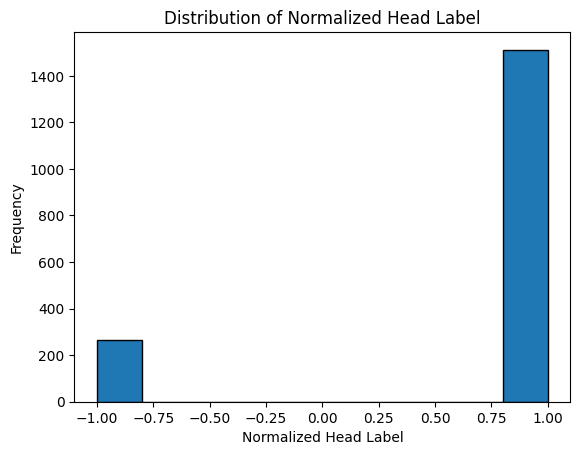

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(df['head_label'], bins=10, edgecolor='k')
plt.title('Distribution of Normalized Head Label')
plt.xlabel('Normalized Head Label')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from tqdm import tqdm
head_labels = []

# 반복문을 통해 각 행에 대해 pipe 함수 적용 및 레이블 추출
for text in tqdm(df['Text']):
    label = get_label(text)
    head_labels.append(label)

# 'head_label' 열로 추가
df['text_label'] = head_labels

In [ ]:
df

In [ ]:
df = df3.drop(columns=['Open','High	','Low','Close','Volume','SOXL_Open','SOXL_High','SOXL_Low','SOXL_Close','SOXL_Volume'])